In [1]:

import numpy as np 
import sys

    
import xarray as xr 
import matplotlib.pyplot as plt 

print("Modules imported")



Modules imported


In [2]:
# velocity = data.horizontalVelX.isel(time=40, nSCHISM_vgrid_layers=0).values

import re 
file="/global/scratch/users/jennaisrael/run_schism/run_16/station.in"
station_id =[]
with open(file) as f:
    f.readline()
    for station in range(int(f.readline())):
        line = f.readline()
        if '!' in line:
            station_id.append(line.split('!')[-1])
        else:
            station_id.append(None)
# print(station_id)

print(len(station_id))

stations = []
for sublist in station_id:
    match = re.search(r'"(.*?)"', sublist)
    if match:
        stations.append(match.group(1).strip())
    else :
        stations.append(sublist.replace("\n", "").strip())
print(len(set(stations)))


for i, station in enumerate(stations):
    print("%d == %s" % (i,station))



263
240
0 == San Joaquin at Antioch
1 == Mokelumne River at Benson's Ferry
2 == Cache Slough
3 == Old River at Coney Island
4 == Clifton Court
5 == Discovery Bay at Indian Slough
6 == Doughty Cut above Grant Line Canal
7 == Sacramento River at Emmaton
8 == EMM upper Emmaton
9 == EMM lower Emmaton
10 == Farrar Park
11 == Grant Line Canal at Tracy Rd Bridge
12 == Green's Landing
13 == Harvey O Banks PP
14 == Holland Tract
15 == Harvey O Banks PP
16 == CCWD Old River near Discovery Bay
17 == CCWD Rock Slough PP
18 == Italian Slough Headwater near Byron
19 == Jersey Point
20 == Sacramento River at Mallard Island
21 == Sacramento River at Mallard Island
22 == Middle River at Howard Rd Bridge
23 == San Joaquin at Mossdale Bridge
24 == Middle River at Tracy Blvd
25 == Old River Barrier near DMC (Above)
26 == Old River below Dam
27 == Old River at Bacon Island
28 == Old River at Head
29 == Old River at Byron
30 == Prisoners Point
31 == Rock Slough at Contra Costa Canal
32 == San Andreas Landin

In [4]:
import pandas as pd

columns = ['time']
stations_no = [str(i) for i in range(263)]
columns = columns + stations_no



# These outputs are invoked with iout_sta=1, and are found in outputs/staout_[1..,9], corresponding respectively to elev, air pressure, wind u, wind v, T, S, u, v, w. Each output has a simple ASCII format:
# Time(sec), variable @ station 1,2,…. (specified in station.in)

filebase="//global/scratch/users/jennaisrael/run_schism/run_16/outputs/staout_1"
filedec="//global/scratch/users/jennaisrael/run_schism/run_17/outputs/staout_1"
fileinc="//global/scratch/users/jennaisrael/run_schism/run_18/outputs/staout_1"

database = pd.read_csv(filebase, sep='\s+', names=columns) #, decode_times=False)
database = database.apply(pd.to_numeric)

datadec = pd.read_csv(filedec, sep='\s+', names=columns) #, decode_times=False)
datadec = datadec.apply(pd.to_numeric)

datainc = pd.read_csv(fileinc, sep='\s+', names=columns) #, decode_times=False)
datainc = datainc.apply(pd.to_numeric)
 
# Add in the number of seconds elapsed @ our chosen timestep
timedelta = [pd.Timedelta(i, unit = 's') for i in database.time]
timestamp = [pd.to_datetime("09-01-2019 00:00") + i for i in timedelta]
    
database["time"] = timestamp
datadec["time"] = timestamp
datainc["time"] = timestamp

Axes(0.125,0.11;0.775x0.77)


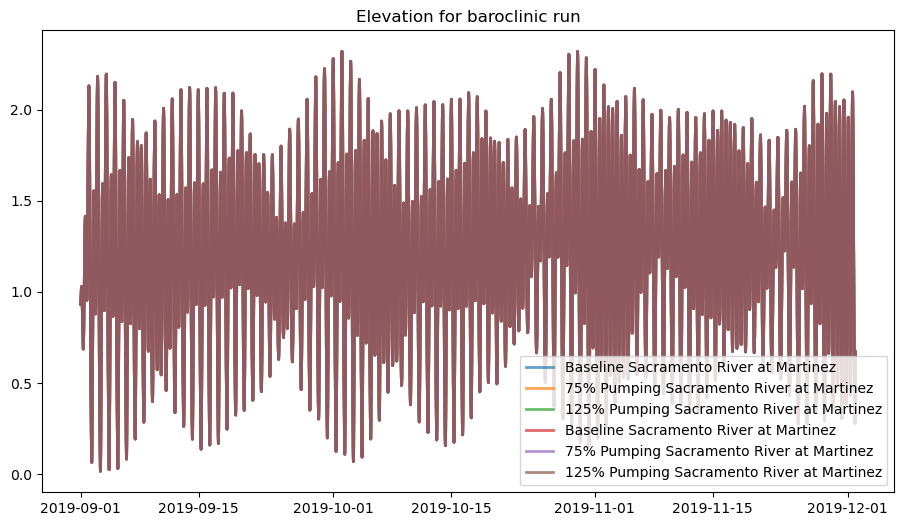

In [10]:
# Make a plot
plt.ioff()

#station_indices=[0, 208, 2, 62, 105]
station_indices=[47,48]

fig = plt.figure(figsize=(11,6))
ax = plt.gca()
# ax.grid(alpha=0.5)
for idx in station_indices:
    values = database[str(idx)]
    ax.plot(database.time, values, label = 'Baseline ' + stations[idx], linewidth=2, alpha =0.7)

    values = datadec[str(idx)]
    ax.plot(datadec.time, values, label = '75% Pumping ' + stations[idx], linewidth=2, alpha =0.7)

    values = datainc[str(idx)]
    ax.plot(datainc.time, values, label = '125% Pumping ' + stations[idx], linewidth=2, alpha =0.7)

    

leg = ax.legend()
print(ax)
#ax.set_xlim(data.time.iloc[0], data.time.iloc[-1])
# ax.grid(which='major', color='b', linestyle='-')
ax.set_title("Elevation for baroclinic run")
plt.show()
# ax.grid()


In [5]:
#repeat for salinity
columns = ['time']
stations_no = [str(i) for i in range(263)]
columns = columns + stations_no



# These outputs are invoked with iout_sta=1, and are found in outputs/staout_[1..,9], corresponding respectively to elev, air pressure, wind u, wind v, T, S, u, v, w. Each output has a simple ASCII format:
# Time(sec), variable @ station 1,2,…. (specified in station.in)

filebase="//global/scratch/users/jennaisrael/run_schism/run_16/outputs/staout_6"
filedec="//global/scratch/users/jennaisrael/run_schism/run_17/outputs/staout_6"
fileinc="//global/scratch/users/jennaisrael/run_schism/run_18/outputs/staout_6"

database = pd.read_csv(filebase, sep='\s+', names=columns) #, decode_times=False)
database = database.apply(pd.to_numeric)

datadec = pd.read_csv(filedec, sep='\s+', names=columns) #, decode_times=False)
datadec = datadec.apply(pd.to_numeric)

datainc = pd.read_csv(fileinc, sep='\s+', names=columns) #, decode_times=False)
datainc = datainc.apply(pd.to_numeric)
 
# Add in the number of seconds elapsed @ our chosen timestep
timedelta = [pd.Timedelta(i, unit = 's') for i in database.time]
timestamp = [pd.to_datetime("07-01-2019 00:00:00") + i for i in timedelta]
    
database["time"] = timestamp
datadec["time"] = timestamp
datainc["time"] = timestamp

In [21]:
# database = pd.read_csv(filebase, sep='\s+', names=columns) #, decode_times=False)
# database = database.apply(pd.to_numeric)
# database.time

0           900.0
1          1800.0
2          2700.0
3          3600.0
4          4500.0
          ...    
8823    7941600.0
8824    7942500.0
8825    7943400.0
8826    7944300.0
8827    7945200.0
Name: time, Length: 8828, dtype: float64

In [29]:
database.time.iloc[4000]

Timestamp('2019-08-11 16:15:00')

Axes(0.125,0.11;0.775x0.77)


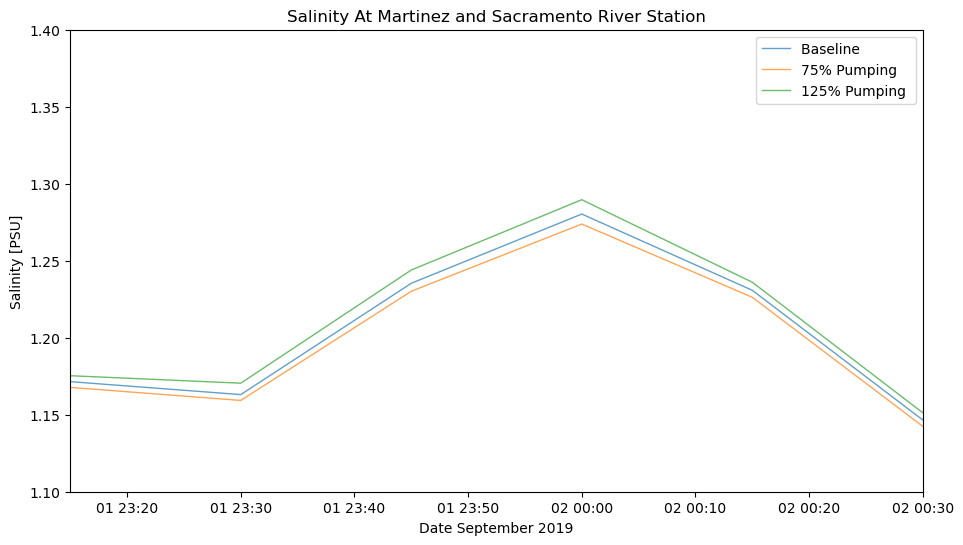

In [24]:
# Make a plot for salinity (sta_out6
plt.ioff()

#station_indices=[0, 208, 2, 62, 105]
#station_indices=[47,48]
station_indices=[47]

fig = plt.figure(figsize=(11,6))
ax = plt.gca()
# ax.grid(alpha=0.5)
for idx in station_indices:
    values = database[str(idx)]
    ax.plot(database.time, values, label = 'Baseline ', linewidth=1, alpha =0.7)

    values = datadec[str(idx)]
    ax.plot(datadec.time, values, label = '75% Pumping ', linewidth=1, alpha =0.7)

    values = datainc[str(idx)]
    ax.plot(datainc.time, values, label = '125% Pumping ', linewidth=1, alpha =0.7)

    

leg = ax.legend()
print(ax)
#ax.set_xlim(data.time.iloc[0], data.time.iloc[-1])
#ax.set_xlim('2019-11-01 00:00:00', '2019-11-07 00:00:00')
ax.set_xlim(database.time.iloc[6044], database.time.iloc[6049])
ax.set_ylim(1.1,1.4)
ax.set_ylabel('Salinity [PSU]')
ax.set_xlabel('Date September 2019')
# ax.grid(which='major', color='b', linestyle='-')
ax.set_title("Salinity At Martinez and Sacramento River Station")
plt.show()
# ax.grid()


Axes(0.125,0.11;0.775x0.77)


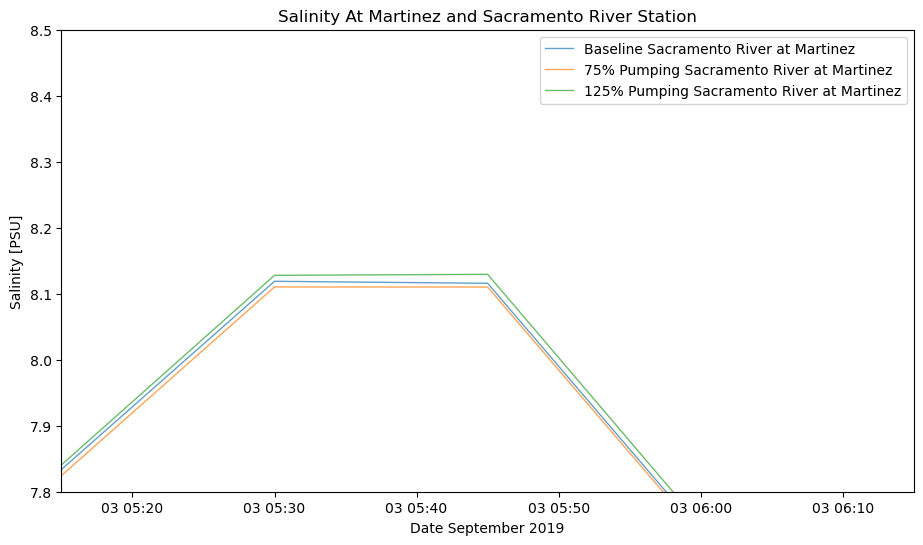

In [19]:
# Make a plot for salinity (sta_out6
plt.ioff()

#station_indices=[0, 208, 2, 62, 105]
#station_indices=[47,48]
station_indices=[47]

fig = plt.figure(figsize=(11,6))
ax = plt.gca()
# ax.grid(alpha=0.5)
for idx in station_indices:
    values = database[str(idx)]
    ax.plot(database.time, values, label = 'Baseline ' + stations[idx], linewidth=1, alpha =0.7)

    values = datadec[str(idx)]
    ax.plot(datadec.time, values, label = '75% Pumping ' + stations[idx], linewidth=1, alpha =0.7)

    values = datainc[str(idx)]
    ax.plot(datainc.time, values, label = '125% Pumping ' + stations[idx], linewidth=1, alpha =0.7)

    

leg = ax.legend()
print(ax)
#ax.set_xlim(data.time.iloc[0], data.time.iloc[-1])
#ax.set_xlim('2019-11-01 00:00:00', '2019-11-07 00:00:00')
ax.set_xlim(database.time.iloc[6164], database.time.iloc[6168])
ax.set_ylim(7.8,8.5)
ax.set_ylabel('Salinity [PSU]')
ax.set_xlabel('Date September 2019')
# ax.grid(which='major', color='b', linestyle='-')
ax.set_title("Salinity At Martinez and Sacramento River Station")
plt.show()
# ax.grid()


In [23]:
#calculate the mean salinity over the period for each one
print(database['47'].mean())
print(datainc['47'].mean())
print(datadec['47'].mean())

8.879736268282738
8.886388142217942
8.873032942772996


In [16]:
file="//global/scratch/users/jennaisrael/run_schism/run_8/outputs/staout_5"
data = pd.read_csv(file, sep='\s+', names=columns) #, decode_times=False)
data = data.apply(pd.to_numeric)

 
# Add in the number of seconds elapsed @ our chosen timestep
timedelta = [pd.Timedelta(i, unit = 's') for i in data.time]
timestamp = [pd.to_datetime("02-16-2018 00:00") + i for i in timedelta]
    
data["time"] = timestamp


Axes(0.125,0.11;0.775x0.77)


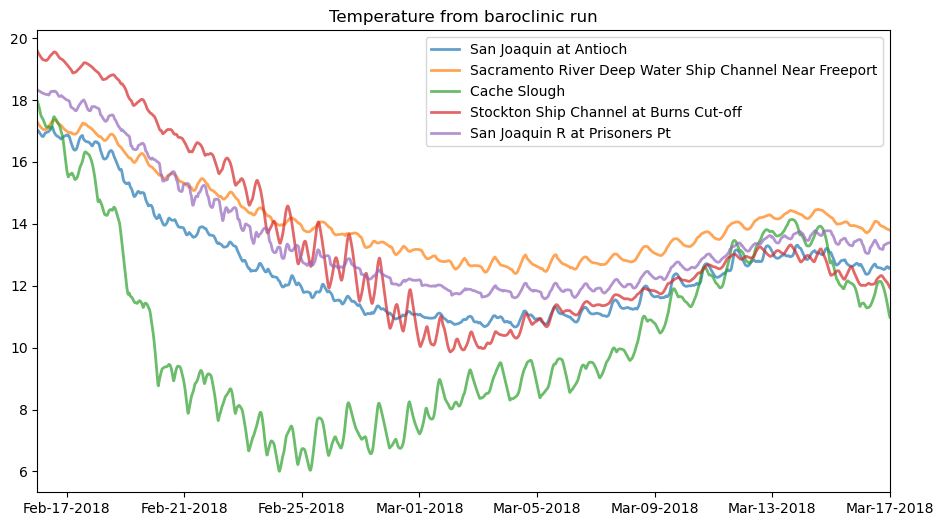

In [17]:
import matplotlib.dates as mdates 
station_indices=[0, 208, 2, 62, 105]

fig = plt.figure(figsize=(11,6))
ax = plt.gca()
# ax.grid(alpha=0.5)
for idx in station_indices:
    values = data[str(idx)]
    ax.plot(data.time, values, label = stations[idx], linewidth=2, alpha =0.7)
    

leg = ax.legend()
print(ax)
ax.set_xlim(data.time.iloc[0], data.time.iloc[-1])
# ax.grid(which='major', color='b', linestyle='-')
ax.set_title("Temperature from baroclinic run")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%Y'))
plt.show()
# ax.grid()

In [8]:
# pip install cartopy

In [9]:
hgrid =xr.open_dataset("//global/scratch/users/jennaisrael/run_schism/run_8/hgrid.nc")
hgrid.head()

<xarray.Dataset>
Dimensions:            (n_hgrid_node: 5, n_hgrid_face: 5, n_face_node: 4,
                        n_hgrid_edge: 5, two: 2, n_vgrid_layers: 5)
Dimensions without coordinates: n_hgrid_node, n_hgrid_face, n_face_node,
                                n_hgrid_edge, two, n_vgrid_layers
Data variables: (12/15)
    hgrid_node_x       (n_hgrid_node) float64 ...
    hgrid_node_y       (n_hgrid_node) float64 ...
    hgrid_contour_x    (n_hgrid_face, n_face_node) float64 ...
    hgrid_contour_y    (n_hgrid_face, n_face_node) float64 ...
    depth              (n_hgrid_node) float64 ...
    hgrid_face_nodes   (n_hgrid_face, n_face_node) int32 ...
    ...                 ...
    hgrid_edge_x       (n_hgrid_edge) float64 ...
    hgrid_edge_y       (n_hgrid_edge) float64 ...
    node_bottom_index  (n_hgrid_node) int64 ...
    ele_bottom_index   (n_hgrid_face) int64 ...
    edge_bottom_index  (n_hgrid_edge) int64 ...
    z                  (n_hgrid_node, n_vgrid_layers) float32 ...
Attributes:
    long_name:      node x-coordinate
    standard_name:  latitude
    units:          degrees_east
    mesh:           SCHISM_hgrid
    location:       node

ERROR 1: PROJ: proj_create_from_database: Open of /global/software/sl-7.x86_64/modules/langs/python/3.10/share/proj failed


AttributeError: 'Dataset' object has no attribute 'x'

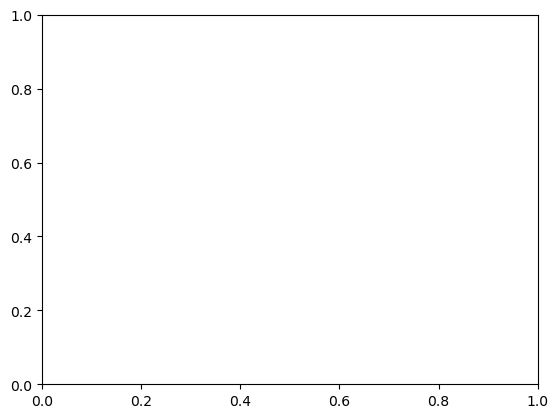

In [10]:
# hgrid.make_plot(show=True)

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from matplotlib.collections import PolyCollection
# axes.tricontourf(self.x, self.y, self.triangles, self.values, **kwargs)
# plt.tricontour(hgrid.x, hgrid.y,hgrid.triangles, velocity, levels=10)

fig = plt.figure() 
ax = plt.gca()
ax.tripcolor(hgrid.x, hgrid.y, hgrid.triangles, velocity+100, shading='flat', vmin=0, vmax = 0.4)

pc = PolyCollection(hgrid.coords[hgrid.quads])
# quad_value = np.mean(self.values[self.quads], axis=1)
# pc.set_array(quad_value)
pc.set_array(velocity)
ax.add_collection(pc)
            
            
# hgrid.quadface(ax=ax)
ax.set_xlim(550000, 650000)
# ax.axis([550000, 650000, 4.14e6, 4.3e6])
ax.axis("scaled")
cbar = plt.colorbar(pc, orientation="horizontal")
# hgrid.triplot()
# tricontourf(self, axes=None, show=True, figsize=None, **kwargs):
#         if len(self.triangles) > 0:
#             axes.tricontourf(self.x, self.y, self.triangles, self.values, **kwargs)
#         return axes